In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [2]:
data=pd.read_csv('data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## What is the number of data points/samples/records?
### 1. samples:11914 
### 2. records: 11914 X 16 =190624
### 3. points:16

# Number of features =16 *(befor feature extraction)*

In [4]:
message = 'Number of duplicated rows: ' + str(data.duplicated().sum())
print(message)


Number of duplicated rows: 715


# Number of duplicated rows: 715

In [5]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### HP:-have 69 null value,Cylinders:- have 30 null value, Market Category:- have 3742 null value
### *Number of records with null values* :- 3742+30+69=3841

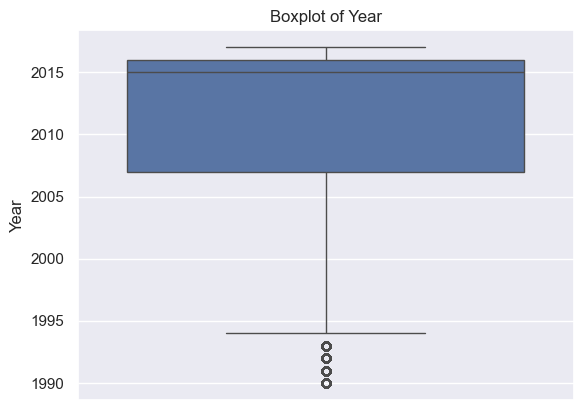

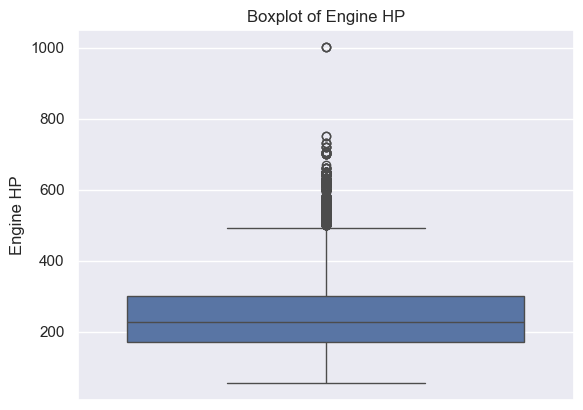

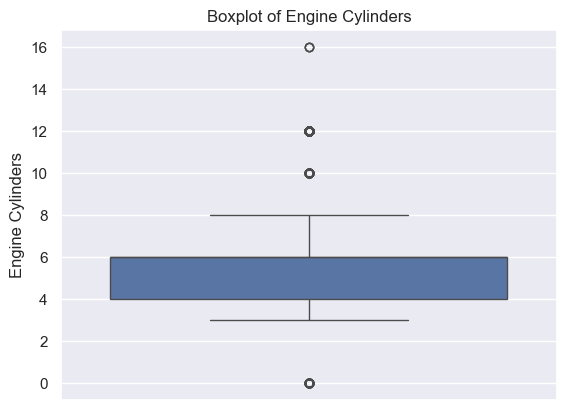

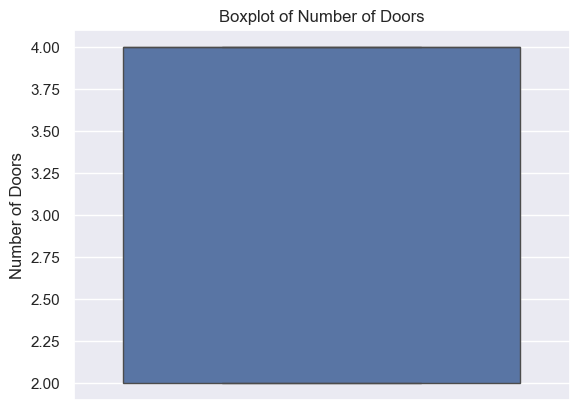

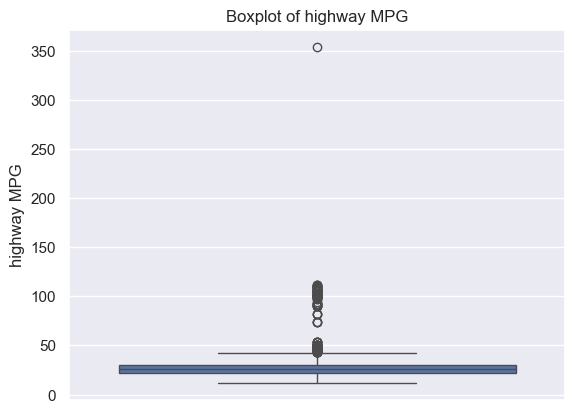

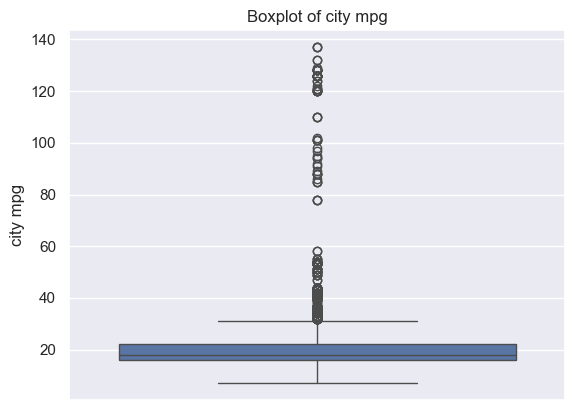

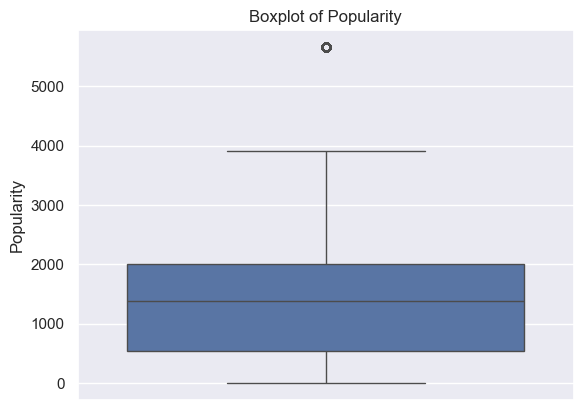

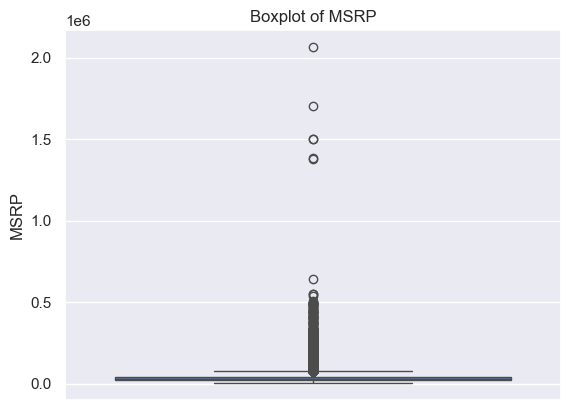

In [6]:
def get_outliers_iqr(data, columns, plot=False):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)        
        IQR = Q3 - Q1        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])        
        if plot:
            sns.boxplot(data=data[column])
            plt.title(f'Boxplot of {column}')
            plt.show()    
    outliers = outliers.drop_duplicates()

    return outliers[columns]


outliers_df = get_outliers_iqr(
    data,
    [col for col in data.columns if data[col].dtype in ['int64', 'float64']],
    plot=True
)


In [7]:
outliers_df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
17,1992,172.0,6.0,4.0,24,17,3105,2000
19,1992,172.0,6.0,4.0,20,16,3105,2000
21,1992,172.0,6.0,4.0,21,16,3105,2000
22,1993,172.0,6.0,4.0,24,17,3105,2000
23,1993,172.0,6.0,4.0,20,16,3105,2000
...,...,...,...,...,...,...,...,...
11736,2008,320.0,8.0,2.0,24,15,1624,85650
11737,2009,320.0,8.0,2.0,24,15,1624,86215
11903,2001,394.0,8.0,2.0,19,12,3916,128000
11904,2002,394.0,8.0,2.0,19,12,3916,130000


# Number of Doors don't have outliers

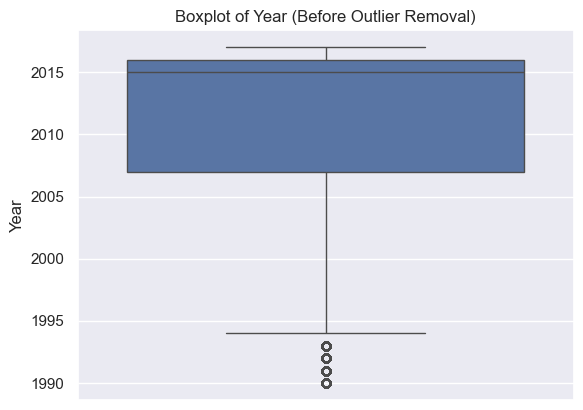

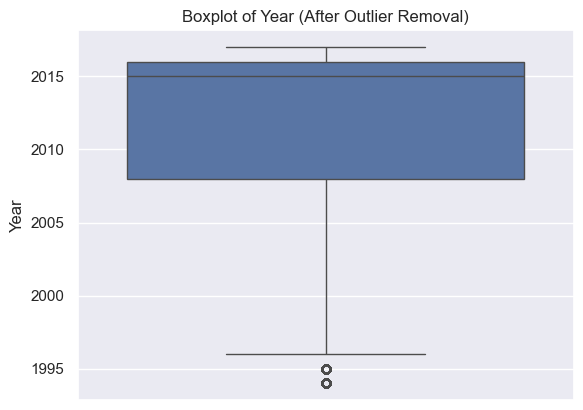

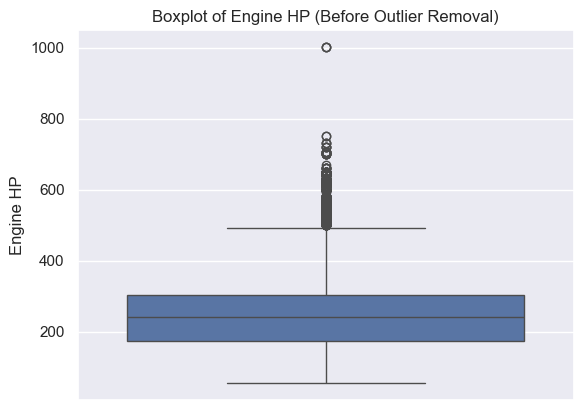

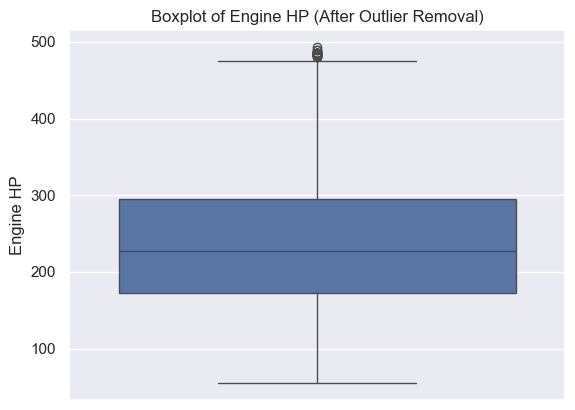

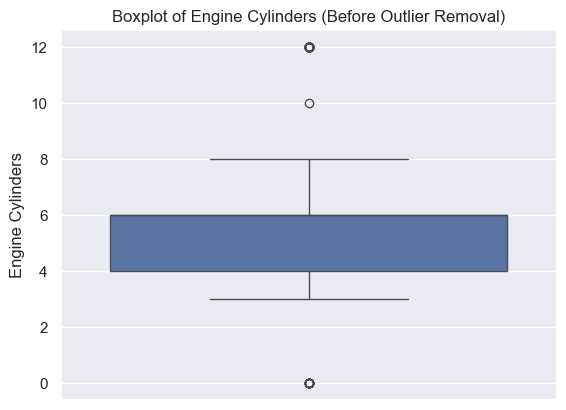

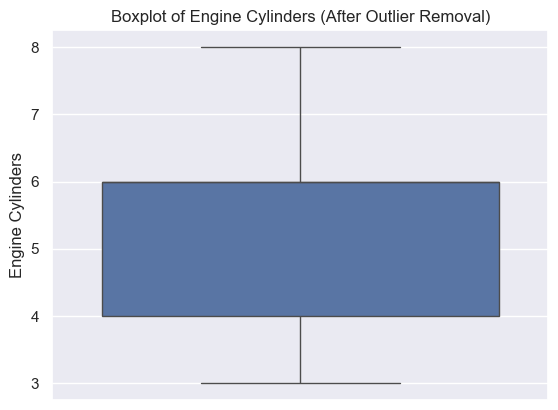

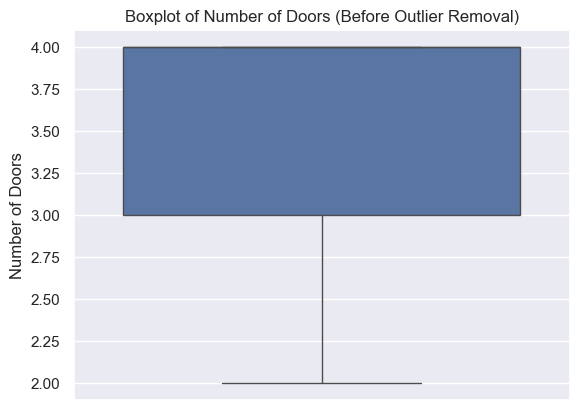

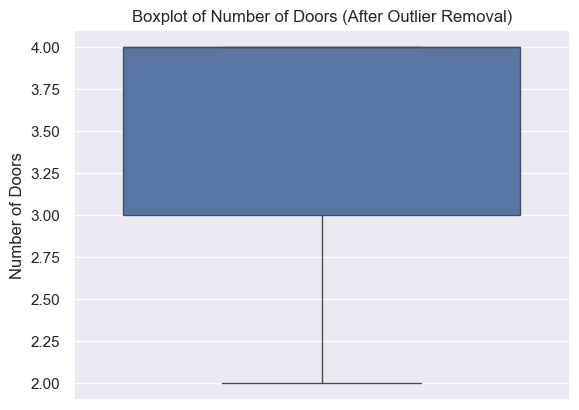

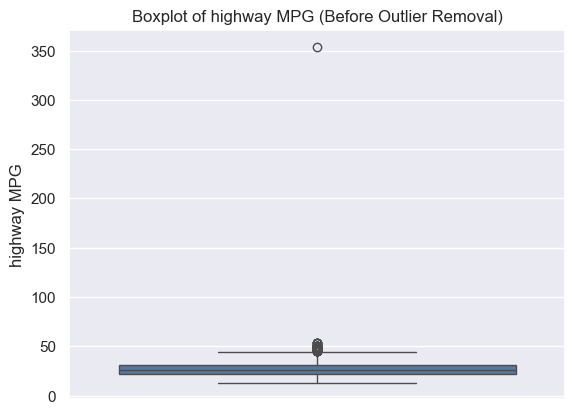

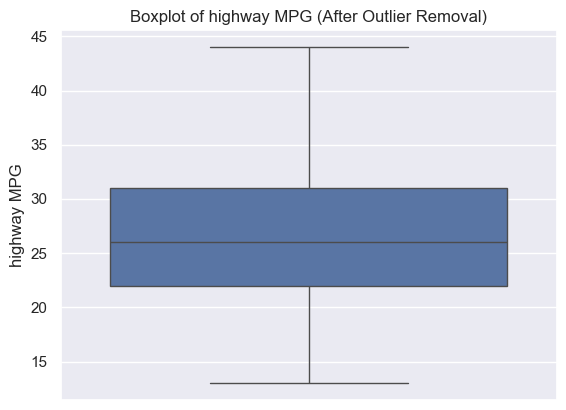

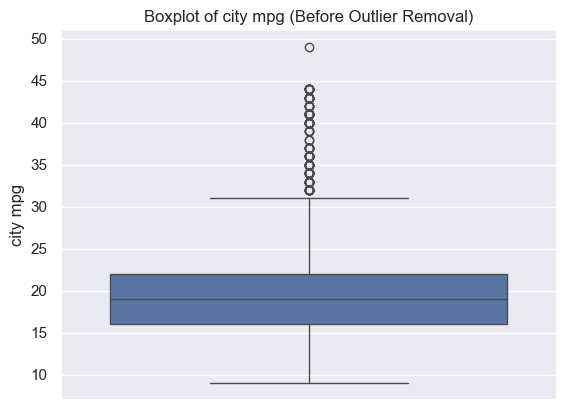

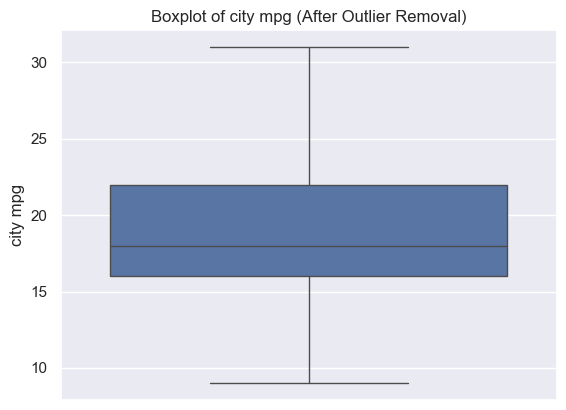

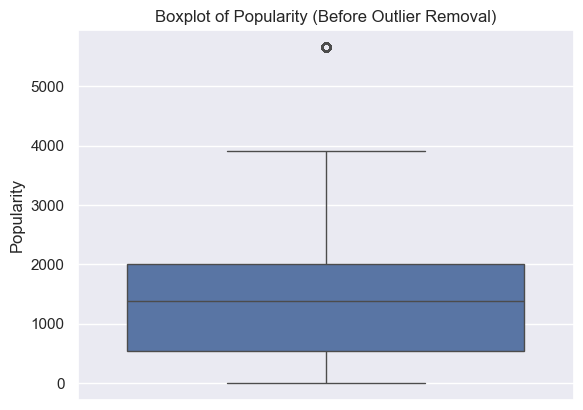

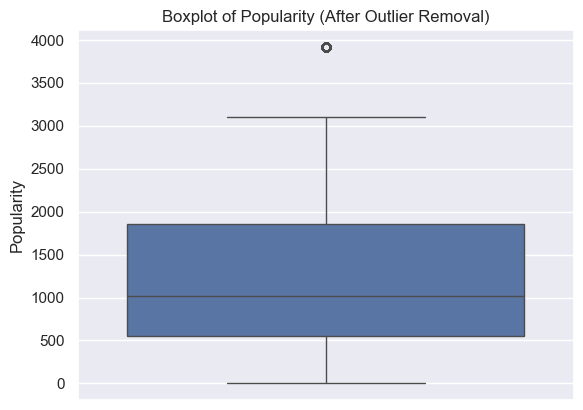

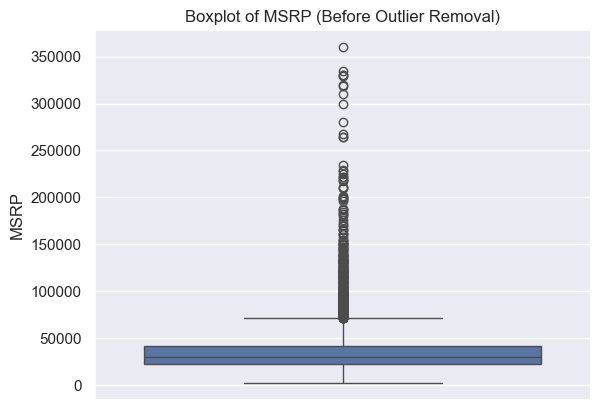

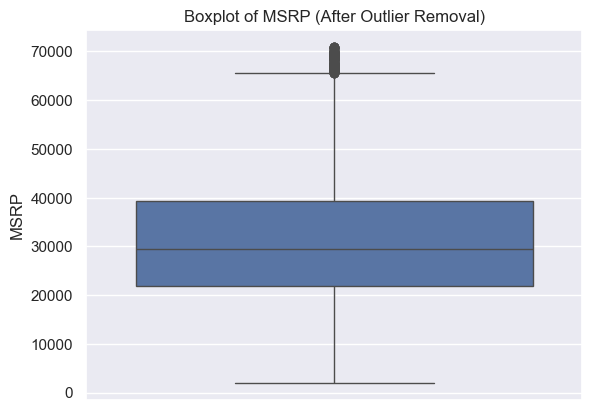

In [8]:
def remove_outliers_iqr(data, columns, plot=False):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if plot:
            # Plot before removing outliers
            sns.boxplot(data=data[column])
            plt.title(f'Boxplot of {column} (Before Outlier Removal)')
            plt.show()
        
        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        
        if plot:
            # Plot after removing outliers
            sns.boxplot(data=data[column])
            plt.title(f'Boxplot of {column} (After Outlier Removal)')
            plt.show()
    
    return data

# Example usage:
cleaned_df = remove_outliers_iqr(data,
    [col for col in data.columns if data[col].dtype in ['int64', 'float64']],
    plot=True)

In [14]:
data=cleaned_df
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


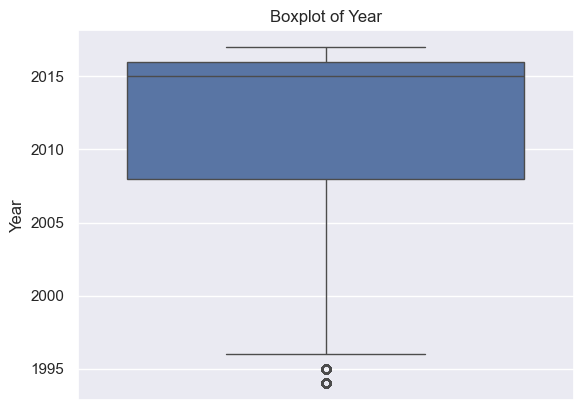

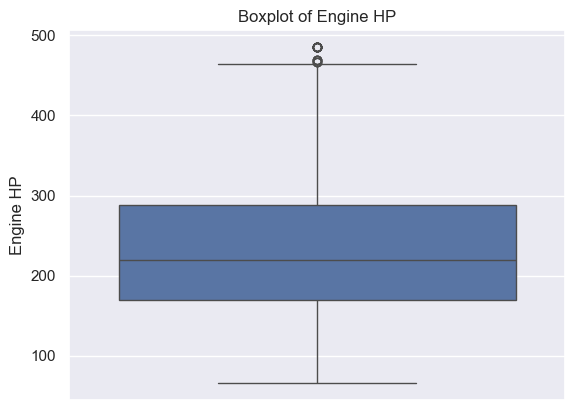

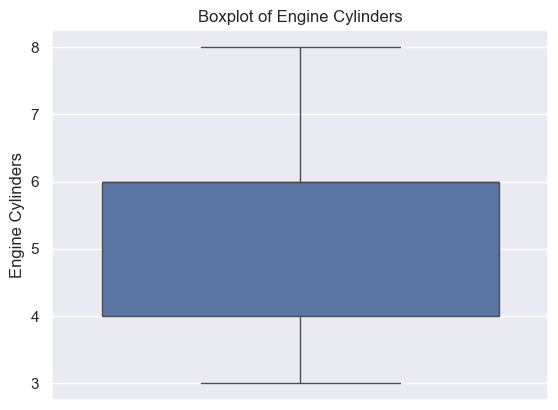

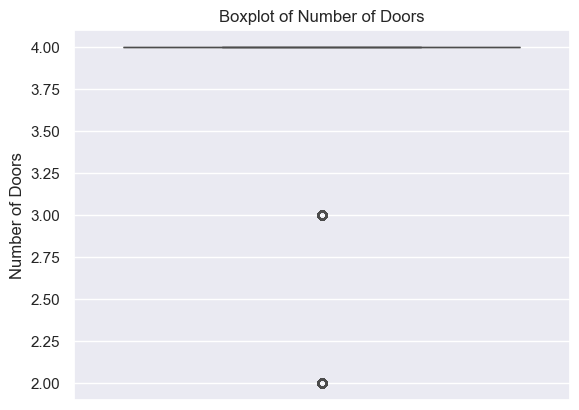

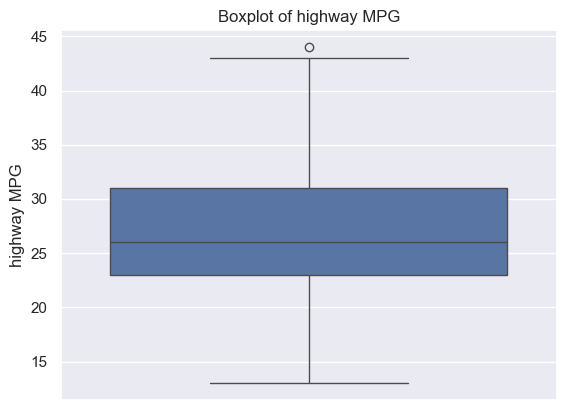

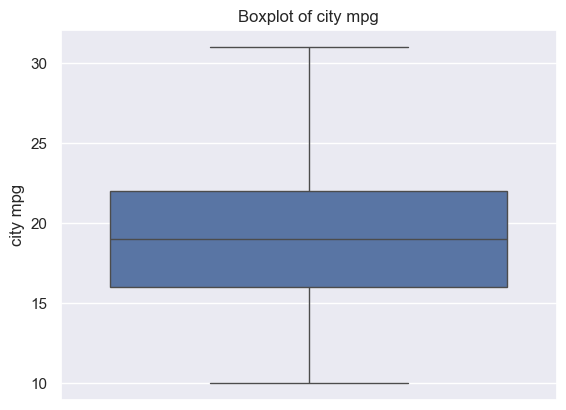

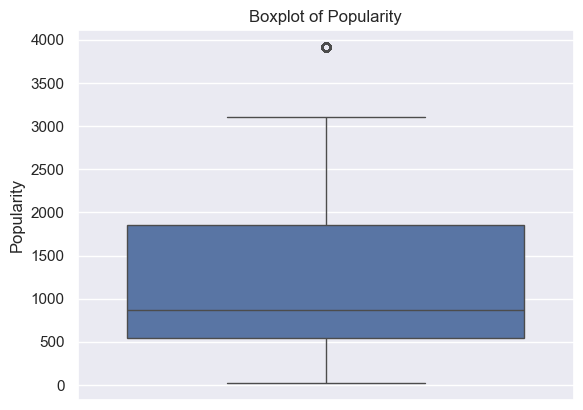

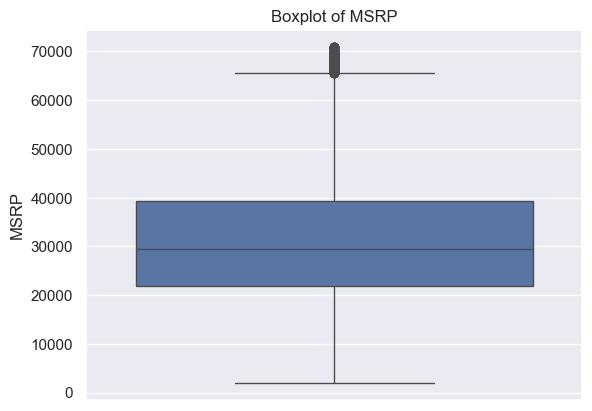

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
27,1994,172.0,6.0,4.0,21,16,3105,2000
28,1994,172.0,6.0,4.0,22,16,3105,2000
29,1994,172.0,6.0,4.0,22,17,3105,2000
30,1994,172.0,6.0,4.0,22,16,3105,2000
31,1994,172.0,6.0,4.0,21,16,3105,2000
...,...,...,...,...,...,...,...,...
11858,2017,420.0,8.0,4.0,22,15,549,68665
11868,2015,420.0,8.0,4.0,21,14,549,67520
11871,2016,420.0,8.0,4.0,21,15,549,68325
11875,2017,420.0,8.0,4.0,20,15,549,68965


In [15]:
outliers_df = get_outliers_iqr(
    data,
    [col for col in data.columns if data[col].dtype in ['int64', 'float64']],
    plot=True
)
outliers_df

In [10]:
data=data.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity',
'Number of Doors', 'Vehicle Size'],axis=1)

In [11]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [12]:
data.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
}, inplace=True)

In [13]:
data.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'MPG-H', 'MPG-C', 'Price'],
      dtype='object')

In [19]:
a={1,2,4,5,6,7,89}

In [20]:
a

{1, 2, 4, 5, 6, 7, 89}

In [21]:
a.add("engine")

In [22]:
a

{1, 2, 4, 5, 6, 7, 89, 'engine'}

In [25]:
a[1].remove("engine") 

TypeError: 'set' object is not subscriptable

In [24]:
a

{1, 2, 4, 5, 6, 7, 89}

In [18]:

print(a.discard("engine"))

None


In [17]:
a

{1, 2, 4, 5, 6, 7, 89}